Hi! Welcome to NG1 for Phase 2. As you have learned some basics about NN, now we will apply those knowledge in some fun experiments.

By doing this NG Challenge, we hope that you have deeper understanding on:
1. Initialize NN module with architecture and hyperparameter in Keras.
2. Changing hyperparameter.
3. Flow of training model in Keras.
3. Loss curve and model performance analysis.

Enjoy!

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def convert_to_gray(inp_data):
  inp_data=tf.squeeze(tf.image.rgb_to_grayscale(inp_data))
  return inp_data

def extract_data(cf10_x,cf10_y,id_class):
  idx=np.where(cf10_y == [id_class])[0]
  x_train=cf10_x[idx,:,:,:]
  return x_train

### Load Cifar 10 Dataset

In [14]:
#Load CIFAR-10 Dataset with Keras function
(cf10_x_train, cf10_y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [15]:
cf10_x_train.shape

(50000, 32, 32, 3)

For this experiment we use only three classes, automobile, ship and truck. Automobile is indexed as Class 1, Ship as Class 8, and Truck as Class 9 on the CIFAR-10. For our dataset, we will have Automobile as class 0, ship as class 1, and truck as class 2.

Color pictures are represented in 3 dimension, representing 3 color dimension R,G,B. Thus, for simpler processing, we also convert the images to grayscale.

In [16]:
x_train_1 = extract_data(cf10_x_train, cf10_y_train,1)
x_train_1 = convert_to_gray(x_train_1)

In [17]:
# Write your code to take data with label 8 and 9
x_train_2 = extract_data(cf10_x_train, cf10_y_train,7)
x_train_3 = extract_data(cf10_x_train, cf10_y_train,8)

x_train_2 = convert_to_gray(x_train_2)
x_train_3 = convert_to_gray(x_train_3)

Text(0.5, 1.0, 'Sample Truck')

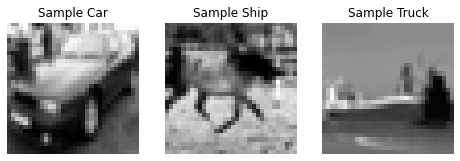

In [18]:
fig,axs = plt.subplots(1,3,figsize=(8,4))
axs[0].imshow(x_train_1[12],cmap='gray')
axs[0].axis('off');axs[0].set_title("Sample Car")
axs[1].imshow(x_train_2[5],cmap='gray')
axs[1].axis('off');axs[1].set_title("Sample Ship")
axs[2].imshow(x_train_3[5],cmap='gray')
axs[2].axis('off');axs[2].set_title("Sample Truck")
#plt.axis('off')

In [19]:
y_train_1 = tf.ones(x_train_1.shape[0])*0
y_train_2 = tf.ones(x_train_2.shape[0])*1
y_train_3 = tf.ones(x_train_3.shape[0])*2

In [20]:
x_train = tf.concat([x_train_1, x_train_2, x_train_3], 0)
y_train = tf.concat([y_train_1,y_train_2, y_train_3],0)
#y_train = tf.cast((y_train==1),tf.int32)

In [21]:
y_train

<tf.Tensor: shape=(15000,), dtype=float32, numpy=array([0., 0., 0., ..., 2., 2., 2.], dtype=float32)>

### Split dataset

Split the train set to 70% of training data and remaining 30% as validation set.

In [ ]:
tf

### Build Network

We will build a function to create our intended network with given initializer and activation function. The flatten, first hidden layer, and output layer has been defined, now it's your turn to fill the remaining hidden layers.

In [22]:
def build_network(weight_init=tf.keras.initializers.GlorotNormal(),hidden_act_func='relu'):
  model = keras.models.Sequential()
  # Flatten layer
  model.add(keras.layers.Flatten(input_shape=[32, 32]))

  # Hidden layers
  # First hidden layer
  model.add(keras.layers.Dense(300,kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.Dense(50,kernel_initializer=weight_init, activation=hidden_act_func))
  #model.add(keras.layers.Dense(15,kernel_initializer=weight_init, activation=hidden_act_func))
  #model.add(keras.layers.Dense(8,kernel_initializer=weight_init, activation=hidden_act_func))
  

  # Output layer
  model.add(keras.layers.Dense(3, activation="softmax"))
  return model

## Parameter setting

### Initializers

In [23]:
initializer = tf.keras.initializers.GlorotNormal() #Glorot Initializer
glorot_model = build_network(weight_init = initializer)

#He Initializer
#Random normal Initializer

Inference with initial weight

In [24]:
y_train

<tf.Tensor: shape=(15000,), dtype=float32, numpy=array([0., 0., 0., ..., 2., 2., 2.], dtype=float32)>

In [25]:
glorot_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [26]:
history = glorot_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 9.7620 - accuracy: 0.4769
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 2.2936 - accuracy: 0.5318
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 1.5421 - accuracy: 0.5737
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2023 - accuracy: 0.5893
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.9128 - accuracy: 0.6302
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8467 - accuracy: 0.6530
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.8123 - accuracy: 0.6606
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7466 - accuracy: 0.6886
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7355 - accuracy: 0.6942
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7099 - accuracy: 0.7040

In [ ]:
y_proba = model.predict(X_new)

## Activation Function

Sigmoid actiation function

ReLU Activation function

Linear activation function

Choose the most optimal activation function and let's move to the next step

### Optimizers

SGD

SGD with Nesterov

ADAM

## Full train

Now that we have choose our weight initializer, activation function, and optimizer, let's initiate a new network and fully train it in long epochs to achieve most optimal result.

Loss curve analysis

## Next steps

Congratulations! You have just completed simple hyperparameter choosing for your own network! Asides from all the properties we tested, neural network still contain other hyperparam such as number of layers and layer sizes. Try to play with them and conduct the experiments. See if you can beat your current model accuracy, and try to understand what parameter effect the accuracy and how to control them. Happy hunting!